In [1]:
import networkx as nx

### Graph Creation

In [2]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

In [3]:
G

In [4]:
G.nodes()

NodeView((1, 2, 3))

In [5]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [6]:
G[1] # same as G.adj[1]

AtlasView({2: {}, 3: {}})

In [7]:
G[1][2]

{}

In [8]:
G.edges([1, 2])

EdgeDataView([(1, 2), (1, 3), (2, 3)])

### Graph Visualization

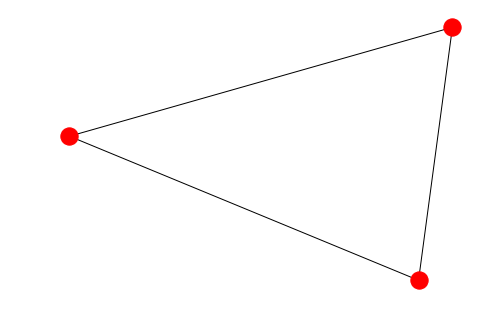

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

In [10]:
import pygraphviz as pgv
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

strict graph {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



In [11]:
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
    B.add_edge(0,i)
    n=B.get_node(i)
    n.attr['fillcolor']="#%2x0000"%(i*16)
    n.attr['height']="%s"%(i/16.0+0.5)
    n.attr['width']="%s"%(i/16.0+0.5)

B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

![title](star.png)

### Dataset Analysis Using Graphs

In [12]:
import pandas as pd 
import numpy as np

data = pd.read_csv('flights1987.csv')

In [13]:
data.shape

(9999, 29)

In [14]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [15]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.CRSDepTime.astype(str).str.replace('(\d{2}$)', '') \
                + ':' + \
            data.CRSDepTime.astype(str).str.extract('(\d{2}$)', 
                                                        expand=False) + \
                ':00'
data["std"]

0        7:30:00
1        7:30:00
2        7:30:00
3        7:30:00
4        7:30:00
5        7:30:00
6        7:30:00
7        7:30:00
8        7:30:00
9        7:30:00
10       7:30:00
11       7:25:00
12       7:25:00
13       7:25:00
14       9:15:00
15       9:15:00
16       9:15:00
17       9:15:00
18       9:15:00
19       9:15:00
20       9:15:00
21       9:15:00
22       9:15:00
23       9:15:00
24       9:15:00
25       9:15:00
26       9:15:00
27       9:15:00
28       9:15:00
29       9:15:00
          ...   
9969    17:10:00
9970    17:10:00
9971    17:10:00
9972    17:10:00
9973    17:10:00
9974    17:10:00
9975    17:10:00
9976    17:10:00
9977    17:10:00
9978    17:10:00
9979    17:10:00
9980    17:10:00
9981    17:10:00
9982    17:50:00
9983    17:50:00
9984    17:50:00
9985    16:50:00
9986    10:40:00
9987    10:40:00
9988    10:40:00
9989    10:40:00
9990    10:40:00
9991    10:40:00
9992    10:40:00
9993    10:40:00
9994    10:40:00
9995    10:40:00
9996    10:40:

In [16]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.CRSArrTime.astype(str).str.replace('(\d{2}$)', '') \
                + ':' \
                + data.CRSArrTime.astype(str).str.extract('(\d{2}$)', 
                                                              expand=False) \
                + ':00'
data['sta']

0        8:49:00
1        8:49:00
2        8:49:00
3        8:49:00
4        8:49:00
5        8:49:00
6        8:49:00
7        8:49:00
8        8:49:00
9        8:49:00
10       8:49:00
11       8:55:00
12       8:55:00
13       8:55:00
14      10:01:00
15      10:01:00
16      10:01:00
17      10:01:00
18      10:01:00
19      10:01:00
20      10:01:00
21      10:01:00
22      10:01:00
23      10:01:00
24      10:01:00
25      10:01:00
26      10:01:00
27      10:01:00
28      10:01:00
29      10:01:00
          ...   
9969    18:00:00
9970    18:00:00
9971    18:00:00
9972    18:00:00
9973    18:00:00
9974    18:00:00
9975    18:00:00
9976    18:00:00
9977    18:00:00
9978    18:00:00
9979    18:00:00
9980    18:00:00
9981    18:00:00
9982    18:49:00
9983    18:49:00
9984    18:49:00
9985    17:52:00
9986    11:55:00
9987    11:55:00
9988    11:55:00
9989    11:55:00
9990    11:55:00
9991    11:55:00
9992    11:55:00
9993    11:55:00
9994    11:55:00
9995    11:55:00
9996    11:55:

In [17]:
# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.DepTime.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') \
                + ':' \
                + data.DepTime.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) \
                + ':00'
data['atd']

0        7:41:00
1        7:29:00
2        7:41:00
3        7:29:00
4        7:49:00
5        7:28:00
6        7:28:00
7        7:31:00
8        7:44:00
9        7:29:00
10       7:35:00
11       7:41:00
12       7:42:00
13       7:26:00
14       9:36:00
15       9:18:00
16       9:28:00
17       9:14:00
18      10:42:00
19       9:34:00
20       9:46:00
21       9:32:00
22       9:47:00
23       9:15:00
24       9:16:00
25       9:44:00
26       9:41:00
27       9:30:00
28       9:20:00
29      10:09:00
          ...   
9969    17:15:00
9970    17:30:00
9971    17:09:00
9972    17:26:00
9973    17:11:00
9974    17:12:00
9975    17:21:00
9976    18:19:00
9977    17:09:00
9978    17:13:00
9979    17:10:00
9980    17:51:00
9981    17:15:00
9982    17:51:00
9983    17:49:00
9984    17:56:00
9985    17:32:00
9986    10:39:00
9987    10:40:00
9988    10:39:00
9989    10:56:00
9990    10:42:00
9991    10:39:00
9992    10:41:00
9993    10:52:00
9994    10:40:00
9995    10:54:00
9996    10:56:

In [18]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.ArrTime.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') \
                + ':' \
                + data.ArrTime.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) \
                + ':00'
data['ata']

0        9:12:00
1        9:03:00
2        9:18:00
3        8:47:00
4        9:22:00
5        8:48:00
6        8:52:00
7        9:02:00
8        9:08:00
9        8:51:00
10       9:04:00
11       9:19:00
12       9:06:00
13       8:48:00
14      10:35:00
15      10:17:00
16      10:37:00
17      10:03:00
18      11:29:00
19      10:24:00
20      10:37:00
21      10:33:00
22      10:36:00
23      10:22:00
24      10:06:00
25      10:27:00
26      10:36:00
27      10:29:00
28      10:23:00
29      11:04:00
          ...   
9969    18:19:00
9970    18:30:00
9971    18:02:00
9972    18:19:00
9973    18:10:00
9974    18:12:00
9975    18:26:00
9976    19:24:00
9977    18:08:00
9978    18:11:00
9979    18:04:00
9980    18:56:00
9981    18:11:00
9982    18:53:00
9983    18:52:00
9984    18:55:00
9985    18:38:00
9986    12:02:00
9987    11:56:00
9988    11:50:00
9989    12:17:00
9990    11:55:00
9991    11:53:00
9992    11:55:00
9993    12:11:00
9994    11:55:00
9995    12:09:00
9996    12:17:

In [19]:
data=data.rename(columns = {'Year':'year',
                        "Month":"month",
                        "DayofMonth": "day"})

In [20]:
data[['year', 'month', 'day']]

,year,month,day
0,1987,10,14
1,1987,10,15
2,1987,10,17
3,1987,10,18
4,1987,10,19
5,1987,10,21
6,1987,10,22
7,1987,10,23
8,1987,10,24
9,1987,10,25


In [21]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [22]:
data = data.drop(['year', 'month', 'day'] ,axis=1)

In [24]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, 
                             source='Origin', 
                             target='Dest', 
                             edge_attr=True,)

In [25]:
FG.edges()

EdgeView([('SAN', 'SFO'), ('SAN', 'OAK'), ('SAN', 'LAS'), ('SAN', 'LAX'), ('SAN', 'SMF'), ('SAN', 'SJC'), ('SFO', 'RNO'), ('SFO', 'LAX'), ('SFO', 'PDX'), ('SFO', 'OAK'), ('SFO', 'BUR'), ('SFO', 'GEG'), ('SFO', 'SCK'), ('SFO', 'MFR'), ('SFO', 'PHX'), ('SFO', 'EUG'), ('SFO', 'SEA'), ('SFO', 'RDM'), ('SFO', 'LGB'), ('SFO', 'ONT'), ('SFO', 'LAS'), ('SFO', 'SNA'), ('SFO', 'PSC'), ('SFO', 'MRY'), ('RNO', 'LAX'), ('RNO', 'SEA'), ('RNO', 'BUR'), ('RNO', 'PDX'), ('BUR', 'OAK'), ('BUR', 'SJC'), ('BUR', 'LAS'), ('BUR', 'SMF'), ('OAK', 'SNA'), ('OAK', 'LAX'), ('OAK', 'SJC'), ('LAX', 'PHX'), ('LAX', 'SMF'), ('LAX', 'SJC'), ('LAX', 'ABQ'), ('LAX', 'LAS'), ('LAX', 'SCK'), ('LAX', 'MRY'), ('LAX', 'TUS'), ('LAX', 'FAT'), ('LAX', 'CCR'), ('LAX', 'SEA'), ('PDX', 'SMF'), ('SJC', 'SNA'), ('LAS', 'SNA'), ('SNA', 'SMF'), ('MFR', 'RDM'), ('SEA', 'BLI'), ('PSC', 'YKM')])

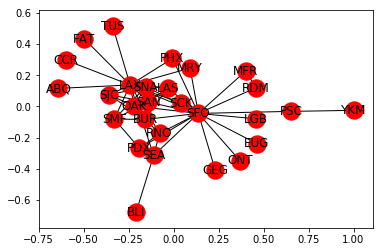

In [26]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports

In [27]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
nx.density(FG) # Average edge density of the Graphs

0.1402116402116402

In [28]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.1481481481481484

In [29]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{1: 14.2,
 2: 13.666666666666666,
 3: 9.666666666666666,
 4: 10.0,
 5: 8.44,
 6: 8.666666666666666,
 15: 4.333333333333333,
 19: 3.736842105263158}